# Práctica 4a. Selección de características numéricas.

La selección de carectrísticas es importante ya que permite que el algoritmo de machine learning entrene de una manera más rápida, reduce la complejidad del modelo y facilita su comprensión. Esta técnica se quedará con la información que realmente es importante y desechará el resto.

## Dataset 1.

Primero importaremos las librerías que son de utilidad para realizar la prácticas y después cargaremos nuestro dataset con el que trabajaremos, tiene que ser uno que solamente contenga datos numéricos, de lo contrario no servirán las técnicas que implementaremos.

In [3]:
# Importamos las librerías con las que visualizaremos los datos y usemos las técnicasde extracción
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [18]:
# Cargando el dataset
df = pd.read_csv('CC GENERAL.csv', sep=',')
df = pd.DataFrame(df)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Notamos que hay una columna categórica ('CUST_ID'), así que la eliminaremos para poder realizar nuestra práctica.

In [19]:
# Eliminamos la columna 'CUST_ID' ya que es una variable categórica y sólo necesitamos numéricas.
del df['CUST_ID']
# Visualizamos sin la columna
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [20]:
# Importamos las últimas librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

### Método de filtro

Este método se usa normalmente como un paso de preprocesamiento. Las características se seleccionan en función de sus puntajes en varias pruebas estadísticas para su correlación con la variable de resultado. Ya que nuestro dataset es numérico podemos utilizar la correlación de Pearson para determinar la dependencia lineal entre las variables.

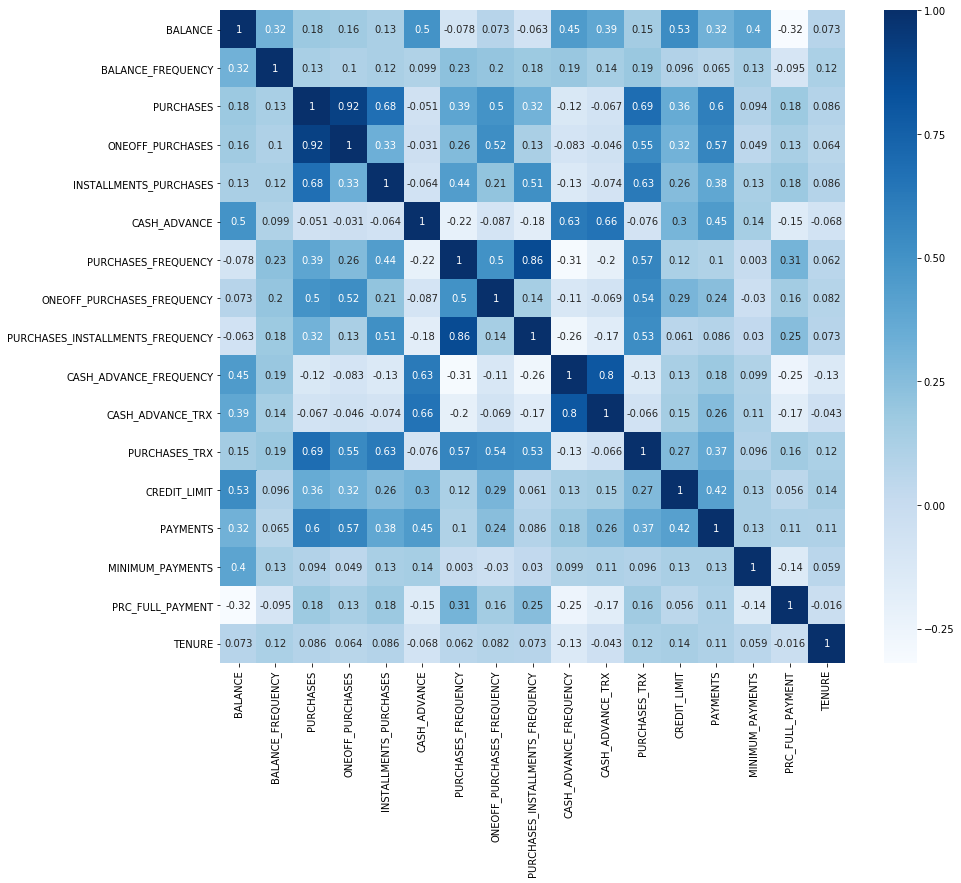

In [21]:
# Graficaremos la matriz de correlación entre las variables para que sea más fácil verlo
plt.figure(figsize=(14,12))
mat_cor = df.corr()
sns.heatmap(mat_cor, annot=True, cmap=plt.cm.Blues)
plt.show()

Mientras más oscuro sea el color mayor correlación entre las variables habrá (la mayor es 1).

In [22]:
#Correlación respecto a la variable de salida o target
cor_target = abs(mat_cor["PURCHASES"])

#Selección de características altamente correlacionadas
relevant_features = cor_target[cor_target>0.5]
relevant_features

PURCHASES                 1.000000
ONEOFF_PURCHASES          0.916843
INSTALLMENTS_PURCHASES    0.679891
PURCHASES_TRX             0.689554
PAYMENTS                  0.603254
Name: PURCHASES, dtype: float64

Las variables anteriores tienen una correlación alta con la variable 'PURCHASES' pero esto no es suficiente. Comprobamos la correlación entre las características y la que tenga mayor correlación se quedará y eliminaremos el resto. Lo haremos visualmente con la matriz de correlaciones graficada anteriormente.

'ONEOFF_PURCHASES' - 'INSTALLMENTS_PURCHASES' -> 0.33, 
'ONEOFF_PURCHASES' - 'PURCHASES_TRX' -> 0.55, 
'ONEOFF_PURCHASES' - 'PAYMENTS' -> 0.57

'ONEOFF_PURCHASES' y 'PAYMENTS' son las variables con mayor correlación entre sí, ahora escogeremos de entre estas dos la que tenga mayor correlación con 'PURCHASES' y esa es 'ONEOFF_PRUCHASES'. Nos quedan 3 características: 'ONEOFF_PRUCHASES', 'INSTALLMENTS_PURCHASES' y 'PURCHASES_TRX' dadas por la correlación Pearson.

In [23]:
#print(df[["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]].corr())
#print(df[["ONEOFF_PURCHASES", "PURCHASES_TRX"]].corr())
#print(df[["ONEOFF_PURCHASES", "PAYMENTS"]].corr())

#print(df[["INSTALLMENTS_PURCHASES", "PURCHASES_TRX"]].corr())
#print(df[["INSTALLMENTS_PURCHASES", "PAYMENTS"]].corr())

#print(df[["PURCHASES_TRX","PAYMENTS"]].corr())

### Método de envoltura (Wrapped method)

En los métodos de envoltura, intentamos usar un subconjunto de características y entrenar un modelo con ellas. Según las inferencias que extraemos del modelo anterior, decidimos agregar o eliminar características de su subconjunto. El problema se reduce esencialmente a un problema de búsqueda.

#### Eliminación hacia atrás (Backward elimination)

En la eliminación hacia atrás, comenzamos con todas las características y eliminamos la característica menos significativa en cada iteración que mejora el rendimiento del modelo. Repetimos esto hasta que no se observe ninguna mejora en la eliminación de características.

In [38]:
# Ya que no podemos usar la funcion fit() porque existen valores NaN, procedemos a reemplzarlos con 0's
df = df.fillna(value=0)

# Separamos las variables dependientes e independiente
X = df.drop("PURCHASES", 1)
y = df["PURCHASES"]

In [39]:
# Agregamos columna de 1's a las variables dependientes
X_1 = sm.add_constant(X)

#Ajuste del modelo sm.OLS
model = sm.OLS(y,X_1).fit()
model.pvalues.sort_values(ascending=False)

PAYMENTS                            0.912773
TENURE                              0.902690
CREDIT_LIMIT                        0.887224
CASH_ADVANCE_TRX                    0.858877
BALANCE_FREQUENCY                   0.844139
CASH_ADVANCE_FREQUENCY              0.818987
CASH_ADVANCE                        0.798923
const                               0.787409
PRC_FULL_PAYMENT                    0.720526
MINIMUM_PAYMENTS                    0.482354
BALANCE                             0.454910
PURCHASES_TRX                       0.243757
PURCHASES_FREQUENCY                 0.179557
PURCHASES_INSTALLMENTS_FREQUENCY    0.120366
ONEOFF_PURCHASES_FREQUENCY          0.043364
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
dtype: float64

Podemos notar que las variables 'ONEOFF_PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES' y 'ONEOFF_PURCHASES' tienen un valor p<0.05 por lo que las demás serán eliminadas. El siguiente bucle nos da las variables finales.

In [41]:
#Backward Elimination
cols = list(X.columns)
pmax = 1

while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']


### Eliminación recursiva de características (Recursive Feature Elimination - RFE)

 es un algoritmo de optimización codicioso que tiene como objetivo encontrar el subconjunto de características con mejor rendimiento. Repetidamente crea modelos y deja de lado la mejor o la peor característica de rendimiento en cada iteración. Construye el siguiente modelo con las características de la izquierda hasta que se agoten todas las características. Luego clasifica las características según el orden de su eliminación.

In [45]:
model = LinearRegression()

#Método RFE
rfe = RFE(model, 8, verbose=1)

#Transformando los datos usando el método RFE
X_rfe = rfe.fit_transform(X,y)  

#Encontrando el modelo de los datos
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
[False  True  True  True False  True  True  True  True  True False False
 False False False False]
[5 1 1 1 7 1 1 1 1 1 2 9 8 6 4 3]


Con esto nos damos cuenta que las características importantes son: BALANCE_FREQUENCY, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX.

Ahora necesitamos encontrar este número óptimo de características, para las cuales la precisión es la más alta.

In [46]:
#Número de características
nof_list = np.arange(1,16)            
high_score = 0

#Proceso para almacenar las características óptimas
nof = 0           
score_list = []

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Número óptimo de características: %d" %nof)
print("Desempeño con %d características: %f" % (nof, high_score))

Número óptimo de características: 2
Desempeño con 2 características: 0.999982


In [48]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 2)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index=cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES'], dtype='object')


Con esto nos damos cuenta que también con Backward Elimination se nos daban este par de características siendo las que mayor precisión tienen.

### Métodos integrados (Embedded method)

Se implementa mediante algoritmos que tienen sus propios métodos de selección de funciones incorporados. Uno de los ejemplos más populares de estos métodos son la regresión LASSO que tiene funciones de penalización incorporadas para reducir el sobreajuste.

La regresión de LASSO realiza la regularización L1 que agrega una penalización equivalente al valor absoluto de la magnitud de los coeficientes.

In [49]:
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
print("Número óptimo de características:" + str(sum(coef != 0)))
print("Desempeño mediante la regularización Lasso: %f" %reg.score(X,y))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Número óptimo de características:4
Desempeño mediante la regularización Lasso: 0.999975


Text(0.5, 1.0, 'Importancia de las características usando el modelo de Lasso')

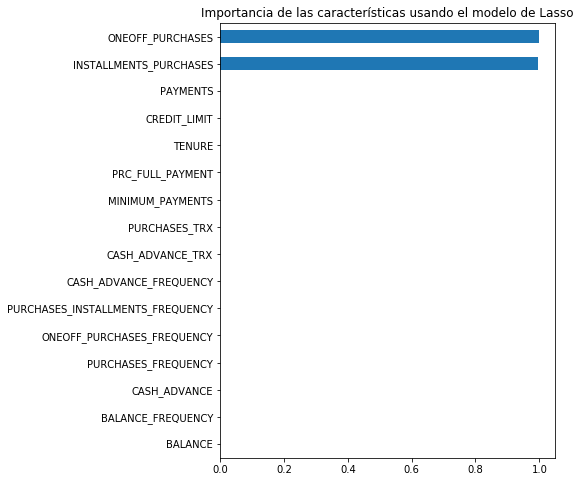

In [56]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de las características usando el modelo de Lasso")

Las características con mayor importancia (0.5) son las que ya sabemos.